**Suhanee Kandalkar D16AD 30**

Exp 03 : Understanding Epsilon Value


---



<ipython-input-3-0ccb7fe728e0>:30: RuntimeWarning: invalid value encountered in divide
  return avg_happiness_over_time, self.visits, self.total_happiness / self.visits


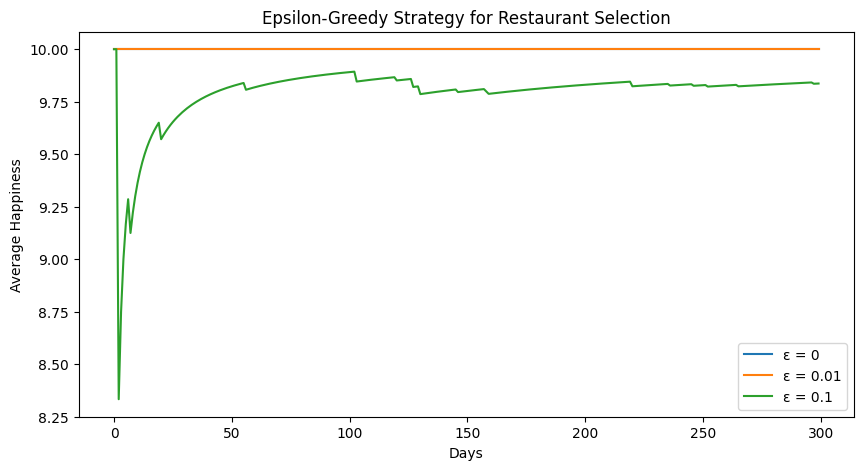

Restaurant 1: Avg Happiness = 10.00, Visits = 283
Restaurant 2: Avg Happiness = 8.00, Visits = 12
Restaurant 3: Avg Happiness = 5.00, Visits = 5


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

class RestaurantSelector:
    def __init__(self, rewards, epsilon=0.1, days=300):
        self.rewards = np.array(rewards)
        self.epsilon = epsilon
        self.days = days
        self.visits = np.zeros(len(rewards), dtype=int)
        self.total_happiness = np.zeros(len(rewards), dtype=float)

    def choose_restaurant(self):
        if random.random() < self.epsilon:
            return random.randint(0, len(self.rewards) - 1)  # Exploration
        else:
            avg_happiness = np.divide(self.total_happiness, self.visits,
                                      out=np.zeros_like(self.total_happiness), where=self.visits > 0)
            return np.argmax(avg_happiness)  # Exploitation

    def simulate(self):
        avg_happiness_over_time = []

        for _ in range(self.days):
            choice = self.choose_restaurant()
            self.visits[choice] += 1
            self.total_happiness[choice] += self.rewards[choice]
            avg_happiness_over_time.append(np.sum(self.total_happiness) / np.sum(self.visits))

        return avg_happiness_over_time, self.visits, self.total_happiness / self.visits

# Define restaurants and simulate selection process
restaurant_rewards = [10, 8, 5]
epsilons = [0, 0.01, 0.1]
num_days = 300

# Store results for visualization
results = {}

plt.figure(figsize=(10, 5))
for eps in epsilons:
    selector = RestaurantSelector(restaurant_rewards, epsilon=eps, days=num_days)
    avg_rewards, visits, final_avg_happiness = selector.simulate()
    results[eps] = avg_rewards
    plt.plot(avg_rewards, label=f'ε = {eps}')

# Plot performance
plt.xlabel('Days')
plt.ylabel('Average Happiness')
plt.title('Epsilon-Greedy Strategy for Restaurant Selection')
plt.legend()
plt.show()

# Print final results
for i, reward in enumerate(restaurant_rewards):
    print(f"Restaurant {i+1}: Avg Happiness = {final_avg_happiness[i]:.2f}, Visits = {visits[i]}")


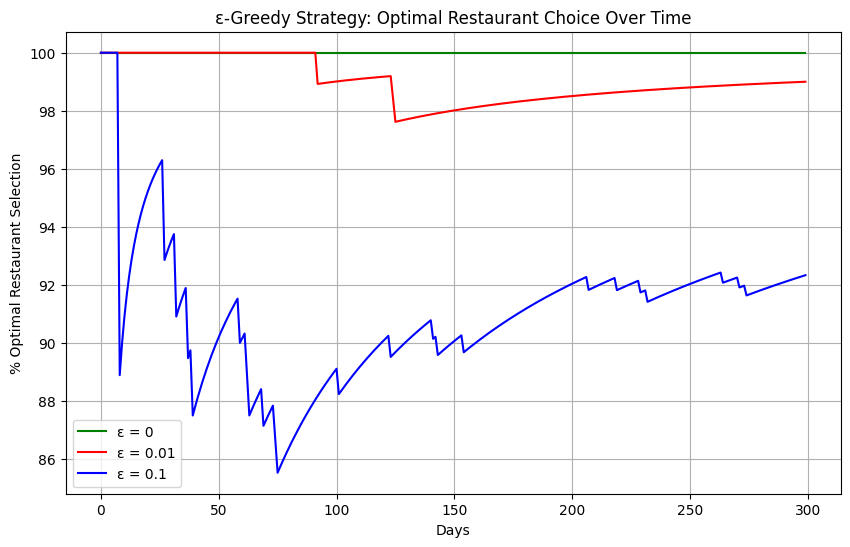

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

class RestaurantSelector:
    def __init__(self, rewards, epsilon=0.1, days=300):
        self.rewards = np.array(rewards)
        self.epsilon = epsilon
        self.days = days
        self.visits = np.zeros(len(rewards), dtype=int)
        self.total_happiness = np.zeros(len(rewards), dtype=float)
        self.best_restaurant = np.argmax(rewards)  # Identify the best restaurant
        self.optimal_selection = np.zeros(days, dtype=int)  # Track optimal selections over time

    def choose_restaurant(self):
        if random.random() < self.epsilon:
            return random.randint(0, len(self.rewards) - 1)  # Exploration
        else:
            avg_happiness = np.divide(self.total_happiness, self.visits,
                                      out=np.zeros_like(self.total_happiness), where=self.visits > 0)
            return np.argmax(avg_happiness)  # Exploitation

    def simulate(self):
        for day in range(self.days):
            choice = self.choose_restaurant()
            self.visits[choice] += 1
            self.total_happiness[choice] += self.rewards[choice]

            # Track optimal selection rate
            if choice == self.best_restaurant:
                self.optimal_selection[day] = 1

        return np.cumsum(self.optimal_selection) / np.arange(1, self.days + 1) * 100  # Convert to percentage

# Define restaurants and simulate selection process
restaurant_rewards = [10, 8, 5]
epsilons = [0, 0.01, 0.1]
num_days = 300

# Store results for visualization
plt.figure(figsize=(10, 6))
colors = ['green', 'red', 'blue']
labels = [f"ε = {eps}" for eps in epsilons]

for eps, color, label in zip(epsilons, colors, labels):
    selector = RestaurantSelector(restaurant_rewards, epsilon=eps, days=num_days)
    optimal_selection_rate = selector.simulate()
    plt.plot(optimal_selection_rate, label=label, color=color)

# Plot settings
plt.xlabel("Days")
plt.ylabel("% Optimal Restaurant Selection")
plt.title("ε-Greedy Strategy: Optimal Restaurant Choice Over Time")
plt.legend()
plt.grid()
plt.show()


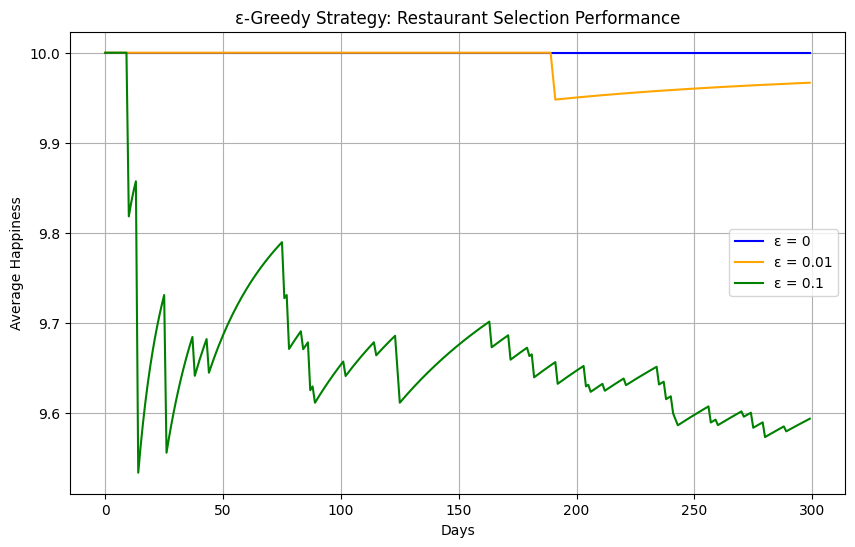

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define restaurant rewards (average happiness values)
restaurant_rewards = [10, 8, 5]
num_days = 300

def epsilon_greedy_restaurant(epsilon, num_days=300):
    num_restaurants = len(restaurant_rewards)
    counts = np.zeros(num_restaurants)  # Visits per restaurant
    total_rewards = np.zeros(num_restaurants)  # Total happiness per restaurant
    avg_happiness_over_time = []  # Store cumulative average happiness

    for day in range(num_days):
        if random.random() < epsilon:
            choice = random.randint(0, num_restaurants - 1)  # Exploration
        else:
            avg_rewards = np.divide(total_rewards, counts,
                                    out=np.zeros_like(total_rewards), where=counts > 0)
            choice = np.argmax(avg_rewards)  # Exploitation

        # Get reward (happiness) from the selected restaurant
        reward = restaurant_rewards[choice]
        counts[choice] += 1
        total_rewards[choice] += reward

        # Compute average happiness so far
        avg_happiness_over_time.append(np.sum(total_rewards) / np.sum(counts))

    return avg_happiness_over_time

# Run epsilon-greedy strategy for different epsilon values
epsilons = [0, 0.01, 0.1]
results = {}

for eps in epsilons:
    results[eps] = epsilon_greedy_restaurant(epsilon=eps, num_days=num_days)

# Plot results
plt.figure(figsize=(10, 6))

colors = ['blue', 'orange', 'green']
labels = [f"ε = {eps}" for eps in epsilons]

for eps, color, label in zip(epsilons, colors, labels):
    plt.plot(results[eps], label=label, color=color)

# Plot settings
plt.xlabel("Days")
plt.ylabel("Average Happiness")
plt.title("ε-Greedy Strategy: Restaurant Selection Performance")
plt.legend()
plt.grid()
plt.show()


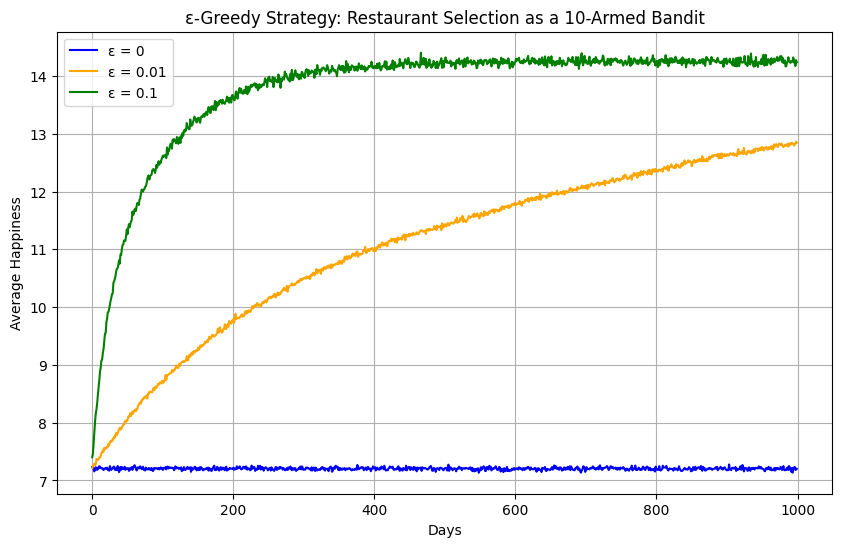

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Number of restaurants (bandit arms)
num_restaurants = 10

# True average happiness levels for each restaurant (analogous to true action values in bandits)
true_happiness = np.random.normal(10, 2, num_restaurants)  # Mean = 10, Std = 2

# Number of days (steps)
num_days = 1000
num_runs = 2000  # Simulations to average results

# Function to simulate restaurant selection using epsilon-greedy
def run_epsilon_greedy(epsilon):
    avg_happiness = np.zeros(num_days)

    for run in range(num_runs):
        q_estimates = np.zeros(num_restaurants)  # Initial estimates
        action_counts = np.zeros(num_restaurants)  # Count of selections

        rewards_over_time = []

        for day in range(num_days):
            if np.random.rand() < epsilon:
                choice = np.random.randint(num_restaurants)  # Explore
            else:
                choice = np.argmax(q_estimates)  # Exploit

            # Simulate happiness reward (Gaussian noise added)
            reward = np.random.normal(true_happiness[choice], 1)
            action_counts[choice] += 1
            q_estimates[choice] += (reward - q_estimates[choice]) / action_counts[choice]  # Update estimate

            # Store average happiness at this step
            avg_happiness[day] += reward

    return avg_happiness / num_runs  # Average over multiple runs

# Run simulations for different ε values
epsilons = [0, 0.01, 0.1]
results = {eps: run_epsilon_greedy(eps) for eps in epsilons}

# Plot results
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green']
labels = [f"ε = {eps}" for eps in epsilons]

for eps, color, label in zip(epsilons, colors, labels):
    plt.plot(results[eps], label=label, color=color)

# Graph settings
plt.xlabel("Days")
plt.ylabel("Average Happiness")
plt.title("ε-Greedy Strategy: Restaurant Selection as a 10-Armed Bandit")
plt.legend()
plt.grid()
plt.show()
